In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(city_data_to_load)
rideData = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
cityRideDataDF = pd.merge(cityData, rideData, on="city", how="inner")

# Display the data table for preview
cityRideDataDF.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

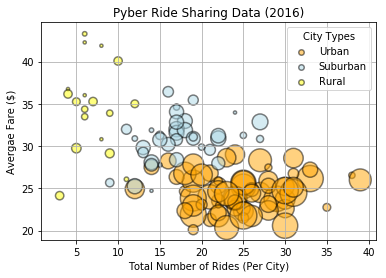

In [2]:
##### Obtain the x and y coordinates for each of the three city types #####
#Grouping the dataframe for the aggregated values --- MEAN, COUNT by City, Type, Driver Count
cityRideGroupedDF = pd.DataFrame(cityRideDataDF.groupby(['city', 'type','driver_count']).fare.agg(['mean', 'count','sum']))
#Resetting the index
cityRideGroupedDF = cityRideGroupedDF.reset_index()


##### Build the scatter plots for each city types #####
#Creating a scatter plot
fig, ax = plt.subplots()

#i) First plit for CITY TYPE = "URBAN"
ax.scatter(cityRideGroupedDF[cityRideGroupedDF['type'] == 'Urban']['count'], 
           cityRideGroupedDF[cityRideGroupedDF['type'] == 'Urban']['mean'],  
           c='orange', 
           s=cityRideGroupedDF[cityRideGroupedDF['type'] == 'Urban']['driver_count']*10 ,
           alpha=0.50, 
           linewidths = 1.5,
           edgecolor='black', 
           label='Urban')

#ii) First plit for CITY TYPE = "SUBURBAN"
ax.scatter(cityRideGroupedDF[cityRideGroupedDF['type'] == 'Suburban']['count'], 
           cityRideGroupedDF[cityRideGroupedDF['type'] == 'Suburban']['mean'], 
           c='lightblue', 
           s=cityRideGroupedDF[cityRideGroupedDF['type'] == 'Suburban']['driver_count']*10 ,
           alpha=0.50, 
           linewidths = 1.5,
           edgecolor='black',
           label='Suburban')

#iii) First plit for CITY TYPE = "RURAL"
ax.scatter(cityRideGroupedDF[cityRideGroupedDF['type'] == 'Rural']['count'], 
           cityRideGroupedDF[cityRideGroupedDF['type'] == 'Rural']['mean'],  
           c='yellow', 
           s=cityRideGroupedDF[cityRideGroupedDF['type'] == 'Rural']['driver_count']*10 ,
           alpha=0.50, 
           linewidths = 1.5,
           edgecolor='black',
           label='Rural')

#Gridding the scatter plot
plt.grid()

#####  Create a legend  #####
#LEGEND Functions
#1) Setting the Legent title
lgnd = plt.legend(title="City Types")
#2) Making the legeng size uniform. Since the size differentiation is only for drivers count per city and not city type
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]



##### Incorporate the other graph properties####
#Setting the Title of the scatter plot
plt.title('Pyber Ride Sharing Data (2016)')

#Setting the X and Y axis of scatter plot
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avergae Fare ($)")

# Save Figure
plt.savefig("Pyber-Ride-Sharing-Data.png")

#Displaying the graph
plt.show()


## Total Fares by City Type

In [3]:
cityRideGroupedDF.head()

,city,type,driver_count,mean,count,sum
0,Amandaburgh,Urban,12,24.641667,18,443.55
1,Barajasview,Urban,26,25.332273,22,557.31
2,Barronchester,Suburban,11,36.422500,16,582.76
3,Bethanyland,Suburban,22,32.956111,18,593.21
4,Bradshawfurt,Rural,7,40.064000,10,400.64


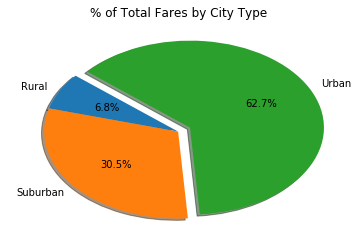

In [4]:
# Calculate Type Percents
faresRidesByCityDF = pd.DataFrame(cityRideDataDF.groupby(['type']).fare.agg(['sum','count']))

# Build Pie Chart
faresRidesByCityDF = faresRidesByCityDF.reset_index()
explode = (0, 0, 0.1)
plt.pie(faresRidesByCityDF['sum'], explode=explode, labels=faresRidesByCityDF['type'], autopct='%.1f%%', shadow=True,startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("pieChart-fares-by-city.png")

# Show Figure
plt.show()


## Total Rides by City Type

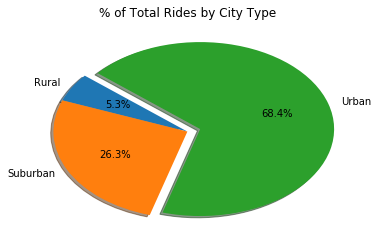

In [6]:
# Calculate Ride Percents
# Build Pie Chart
plt.pie(faresRidesByCityDF['count'], explode=explode, labels=faresRidesByCityDF['type'], autopct='%.1f%%', shadow=True,startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("pieChart-rides-by-city.png")

# Show Figure
plt.show()

## Total Drivers by City Type

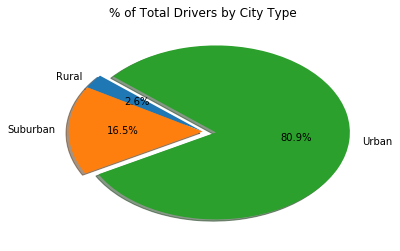

In [7]:
# Calculate Driver Percents
driversByCityDF = pd.DataFrame(cityRideGroupedDF.groupby(['type']).driver_count.agg(['sum']))
driversByCityDF = driversByCityDF.reset_index()
driversByCityDF

# Build Pie Charts
plt.pie(driversByCityDF['sum'], explode=explode, labels=driversByCityDF['type'], autopct='%.1f%%', shadow=True,startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
#plt.savefig("pieChart-Drivers-by-city.png")

# Show Figure
plt.show()